<a href="https://colab.research.google.com/github/paradkarpravin15/Salary_Prediction_Model/blob/main/Salary_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary Prediction Model - Linear Regression Algorithm


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Salary_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
print(df.tail())

    Unnamed: 0  YearsExperience    Salary
25          25              9.1  105583.0
26          26              9.6  116970.0
27          27              9.7  112636.0
28          28             10.4  122392.0
29          29             10.6  121873.0


In [5]:
print(df.shape)

(30, 3)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes
None


In [7]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [8]:
print(df.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.413333   76004.000000
std           2.837888   27414.429785
min           1.200000   37732.000000
25%           3.300000   56721.750000
50%           4.800000   65238.000000
75%           7.800000  100545.750000
max          10.600000  122392.000000


In [9]:
print(df.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


In [10]:
# Check for duplicate rows
print("Number of Duplicate Rows:",end=" ")
print(df.duplicated().sum())

Number of Duplicate Rows: 0


In [11]:
# Unique values in each column
print("Unique values per column:")
for col in df.columns:
  print(f"{col}: {df[col].nunique()} unique values")

Unique values per column:
YearsExperience: 28 unique values
Salary: 30 unique values


In [12]:
print(df.dtypes)

YearsExperience    float64
Salary             float64
dtype: object


In [13]:
print(df.columns)

Index(['YearsExperience', 'Salary'], dtype='object')


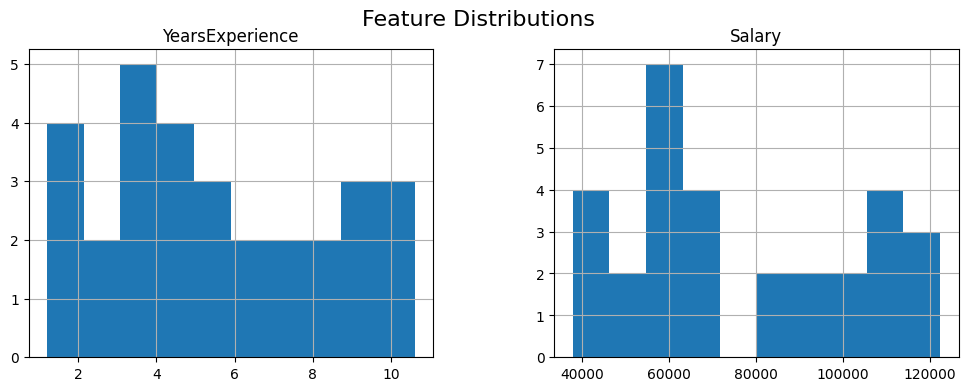

In [14]:
# Histogram for numerical columns
df.hist(figsize=(12, 4), bins=10)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

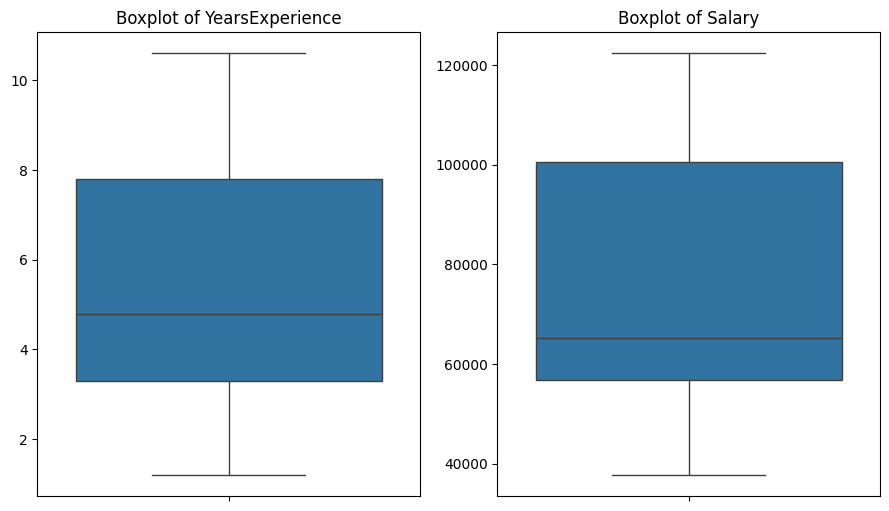

In [15]:
# Boxplot for numerical features to check for outliers
plt.figure(figsize=(9,10))
for i, col in enumerate(df, 1):
  plt.subplot(2,2,i)
  sns.boxplot(data=df, y=col)
  plt.title(f"Boxplot of {col}")
  plt.ylabel("")
plt.tight_layout()
plt.show()

*   In this dataset outliers are not present.

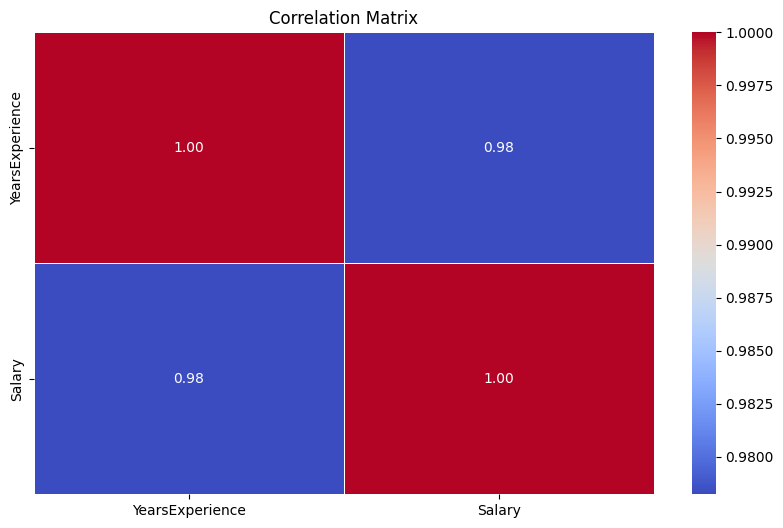

In [16]:
# Plot heatmap to visualize check correlation between numeric features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f",linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Data Preprocessing

## Feature Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [18]:
# Create separate copies of the dataset for each scaling method
df_minmax = df.copy()
df_standard = df.copy()
df_robust = df.copy()

In [19]:
# Selecting only numerical columns for scaling
num_cols = df.columns

In [20]:
# Min-Max Sacling (0 to 1 range)
minmax_scaler = MinMaxScaler()
df_minmax[num_cols] = minmax_scaler.fit_transform(df_minmax[num_cols])

In [21]:
# Display random five rows from dataset
print(df_minmax.sample(5))

    YearsExperience    Salary
21         0.638298  0.715119
2          0.042553  0.000000
1          0.021277  0.100094
10         0.297872  0.301051
15         0.404255  0.356804


In [22]:
# Standardize features for model training (Mean=0, Std=1)
standard_scaler = StandardScaler()
df_standard[num_cols] = standard_scaler.fit_transform(df_standard[num_cols])

In [23]:
# Display random five rows from dataset
print(df_standard.sample(5))

    YearsExperience    Salary
1         -1.438373 -1.105527
16        -0.076458 -0.370043
10        -0.506537 -0.474333
12        -0.470697 -0.706620
6         -0.829096 -0.588158


In [24]:
# Robust Scaling
robust_scaler = RobustScaler()
df_robust[num_cols] = robust_scaler.fit_transform(df_robust[num_cols])

In [25]:
# Display random five rows from dataset
print(df_robust.sample(5))

    YearsExperience    Salary
20         0.466667  0.604714
23         0.777778  1.108411
0         -0.800000 -0.590863
5         -0.400000 -0.196125
7         -0.333333 -0.246258


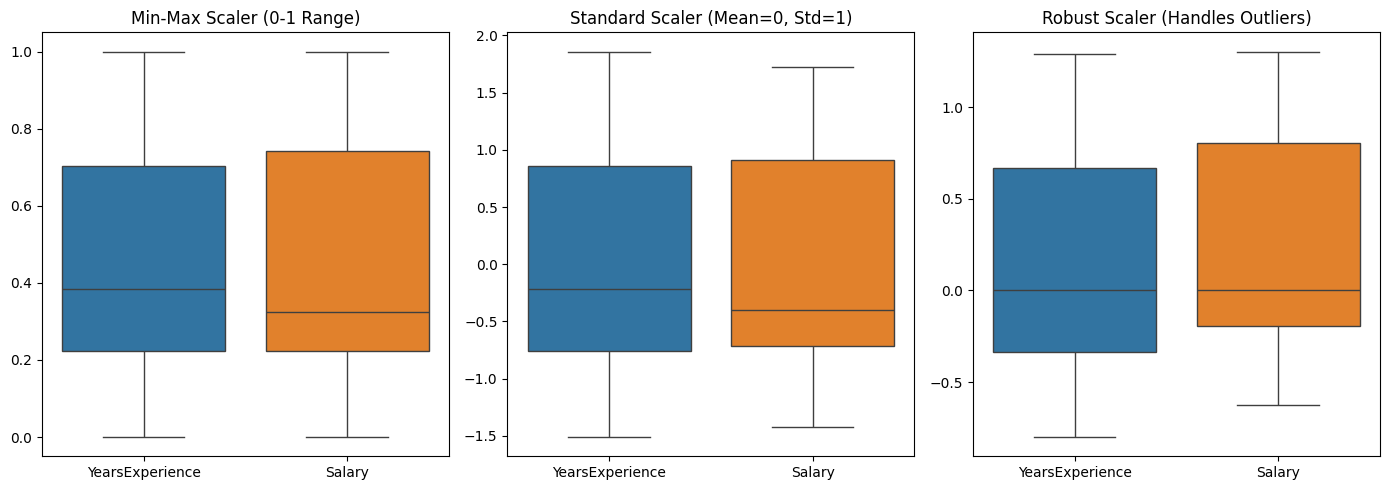

In [26]:
# Visualizing the difference
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

#MinMaax Scaler
sns.boxplot(data=df_minmax, ax=axes[0])
axes[0].set_title("Min-Max Scaler (0-1 Range)")

# Standard Scaler
sns.boxplot(data=df_standard, ax=axes[1])
axes[1].set_title("Standard Scaler (Mean=0, Std=1)")

# Robust Scaler
sns.boxplot(data=df_robust, ax=axes[2])
axes[2].set_title("Robust Scaler (Handles Outliers)")
plt.tight_layout()
plt.show()

# Data Splitting (Train-Test Split)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Salary'])  # features
y = df['Salary']   # target variable

In [29]:
print(X)

    YearsExperience
0               1.2
1               1.4
2               1.6
3               2.1
4               2.3
5               3.0
6               3.1
7               3.3
8               3.3
9               3.8
10              4.0
11              4.1
12              4.1
13              4.2
14              4.6
15              5.0
16              5.2
17              5.4
18              6.0
19              6.1
20              6.9
21              7.2
22              8.0
23              8.3
24              8.8
25              9.1
26              9.6
27              9.7
28             10.4
29             10.6


In [30]:
print(y)

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(30, 1) (24, 1) (6, 1)


# Model Training

Linear Regression Model

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
# loading linear regression model
lr_model = LinearRegression()

In [35]:
# train the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Make predictions on test data
y_pred_lr = lr_model.predict(X_test)
print("\nPredication:\n", y_pred_lr.round(2))


Predication:
 [103499.73  56182.76  64699.81  53343.74 111070.45 116748.48]


In [37]:
# Print the model coefficients
print("Model coefficients:", lr_model.coef_.round(2))
print("\nIntercept:", lr_model.intercept_.round(2))

Model coefficients: [9463.39]

Intercept: 24953.56


In [38]:
print("Linear Regression Performance")
print(f"Accuracy Score:",lr_model.score(X_test,y_test)*100)

Linear Regression Performance
Accuracy Score: 95.01357561277413


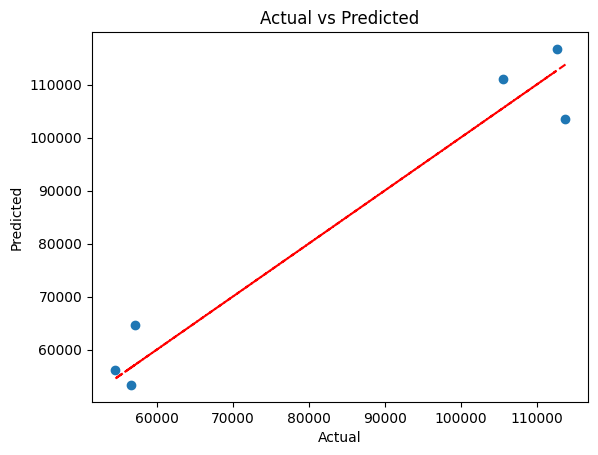

In [39]:
# Scatter plot for Actual vs Predicted
plt.scatter(y_test, y_pred_lr)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Model Evaluation

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
# Model Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test,y_pred_lr))
print("RMSE:", mean_squared_error(y_test,y_pred_lr))
print("R2 Score:", r2_score(y_test,y_pred_lr))

MAE: 5427.838697955161
MSE: 37553440.00476192
RMSE: 37553440.00476192
R2 Score: 0.9501357561277413


In [42]:
for name, coef in zip(X.columns, lr_model.coef_):
  print(f"{name}: {coef}")

YearsExperience: 9463.394678492241


In [43]:
import numpy as np

In [45]:
# You should reshape each experience as a separate sample if predicting for multiple people
# Here's how to do it properly:
exper = np.array([[1.2], [7.4], [3], [5], [0], [2], [5]])  # One row per example


In [46]:
# Predict salary
predictions = lr_model.predict(exper)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
# Print results
for i, salary in enumerate(predictions):
    print(f"Experience: {exper[i][0]} years => Predicted Salary: {salary:.2f}")

Experience: 1.2 years => Predicted Salary: 36309.63
Experience: 7.4 years => Predicted Salary: 94982.68
Experience: 3.0 years => Predicted Salary: 53343.74
Experience: 5.0 years => Predicted Salary: 72270.53
Experience: 0.0 years => Predicted Salary: 24953.56
Experience: 2.0 years => Predicted Salary: 43880.35
Experience: 5.0 years => Predicted Salary: 72270.53
